In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os

In [2]:
result_dir = '../results'
model_names = ['UserBasedRecommender', 'ItemBasedRecommender']
ks = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
similarities = ['cosine', 'pearson']
dataset_names = ['MovieLensDataset100K_testset', 'MovieLensDataset1M_testset']

In [3]:
user_based_cosine_dataframes = []
for k in ks:
    file_path = os.path.join(result_dir, 'userbased',
                             'precise_' + model_names[0] + '_' + k 
                             + '_' + similarities[0] + '_' + dataset_names[0] + '.csv')
    dataframe = pd.read_csv(file_path)
    user_based_cosine_dataframes.append(dataframe)

In [4]:
user_based_pearson_dataframes = []
for k in ks:
    file_path = os.path.join(result_dir, 'userbased',
                             'precise_' + model_names[0] + '_' + k 
                             + '_' + similarities[1] + '_' + dataset_names[0] + '.csv')
    dataframe = pd.read_csv(file_path)
    user_based_pearson_dataframes.append(dataframe)

In [5]:
item_based_cosine_dataframes = []
for k in ks[:5]:
    file_path = os.path.join(result_dir, 'itembased',
                             'precise_' + model_names[1] + '_' + k 
                             + '_' + similarities[0] + '_' + dataset_names[0] + '.csv')
    dataframe = pd.read_csv(file_path)
    item_based_cosine_dataframes.append(dataframe)

In [6]:
item_based_pearson_dataframes = []
for k in ks[:5]:
    file_path = os.path.join(result_dir, 'itembased',
                             'precise_' + model_names[1] + '_' + k 
                             + '_' + similarities[1] + '_' + dataset_names[0] + '.csv')
    dataframe = pd.read_csv(file_path)
    item_based_pearson_dataframes.append(dataframe)

In [81]:
user_based_cosine_dataframes_2 = []
for k in ks[:3]:
    file_path = os.path.join(result_dir, 'userbased',
                             'precise_' + model_names[0] + '_' + k 
                             + '_' + similarities[0] + '_' + dataset_names[1] + '.csv')
    dataframe = pd.read_csv(file_path)
    user_based_cosine_dataframes_2.append(dataframe)

In [7]:
user_based_cosine_dataframes[0]

,Unnamed: 0,Precises,Recalls,F-scores,Hit ratios
0,0,0.465000,0.022255,0.041302,0.022255
1,1,0.626667,0.044597,0.080030,0.044597
2,2,0.700000,0.065580,0.114217,0.065580
3,3,0.724000,0.082414,0.139562,0.082414
4,4,0.738333,0.099882,0.164547,0.099882
...,...,...,...,...,...
95,95,0.425773,0.613040,0.422955,0.613040
96,96,0.423469,0.614433,0.422008,0.614433
97,97,0.422121,0.617461,0.422091,0.617461
98,98,0.419900,0.618859,0.421213,0.618859


In [67]:
def plot_p_r_curves(dataframes, title, save_name='None', c='FF00FF'):
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.figsize'] = (5, 5)
    k = 10
    color = int(c, base=16)
    for dataframe in dataframes:
        if k == 10:
            color += int('00E000', base=16)
        elif k == 20:
            color -= int('002000', base=16)  
        elif k == 30:
            color -= int('002000', base=16)     
        elif k == 40:
            color -= int('002000', base=16)         
        elif k == 50:
            color = int(c, base=16)
        elif k == 50:
            color += int('00C000', base=16)            
        else:
            color += int('001000', base=16)
        print(hex(color))
        plt.plot(dataframe['Precises'], dataframe['Recalls'],
                 label='K = ' + str(k), c='#' + hex(color)[2:])
        k += 10
    plt.title(title)
    plt.xlabel('Precise', fontsize=12)
    plt.ylabel('Recall', fontsize=12)
    plt.yticks(fontproperties = 'Times New Roman', size = 12)
    plt.xticks(fontproperties = 'Times New Roman', size = 12)
    plt.legend(fontsize=10)
    #plt.savefig('./' + save_name + '.jpg', bbox_inches = 'tight')
    #plt.savefig('./' + save_name + '.eps', dpi=300, format='eps', bbox_inches = 'tight')

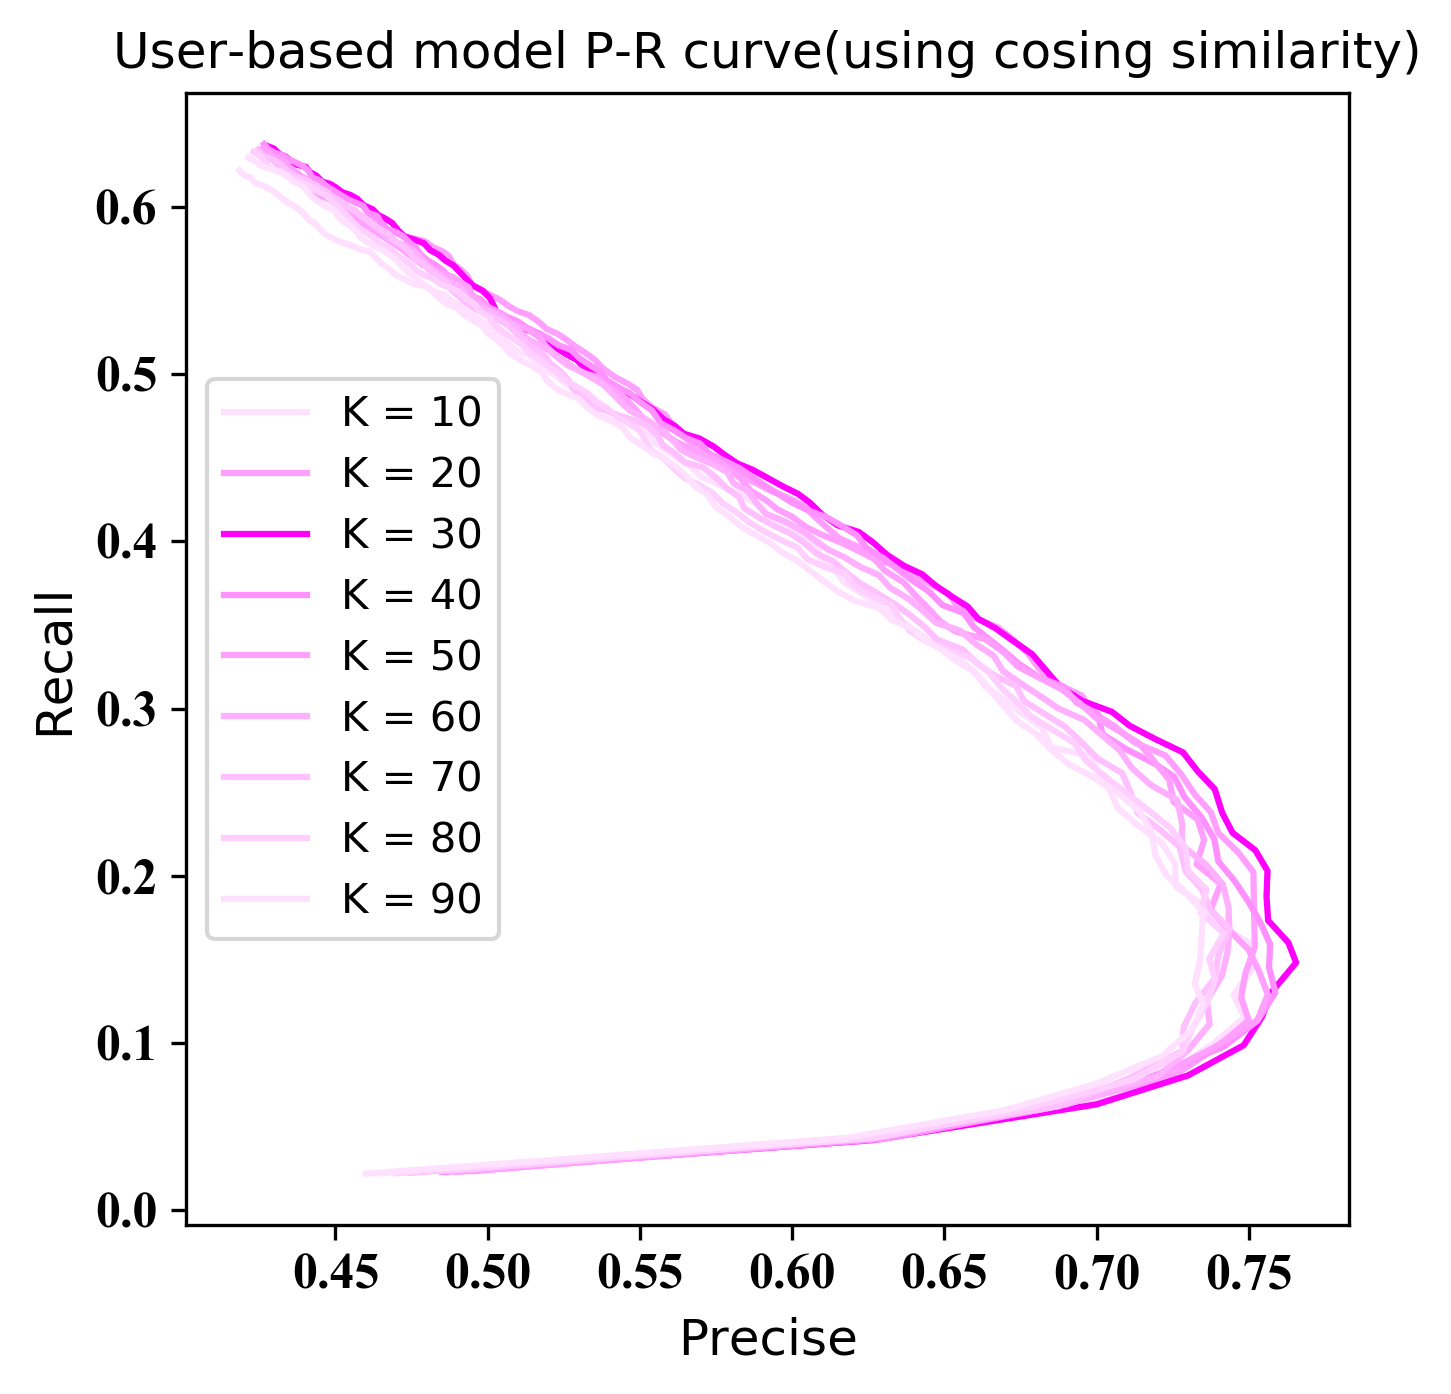

In [12]:
plot_p_r_curves(user_based_cosine_dataframes, 'User-based model P-R curve(using cosine similarity)', save_name='userbased_pr_cosine_movieLens100K')

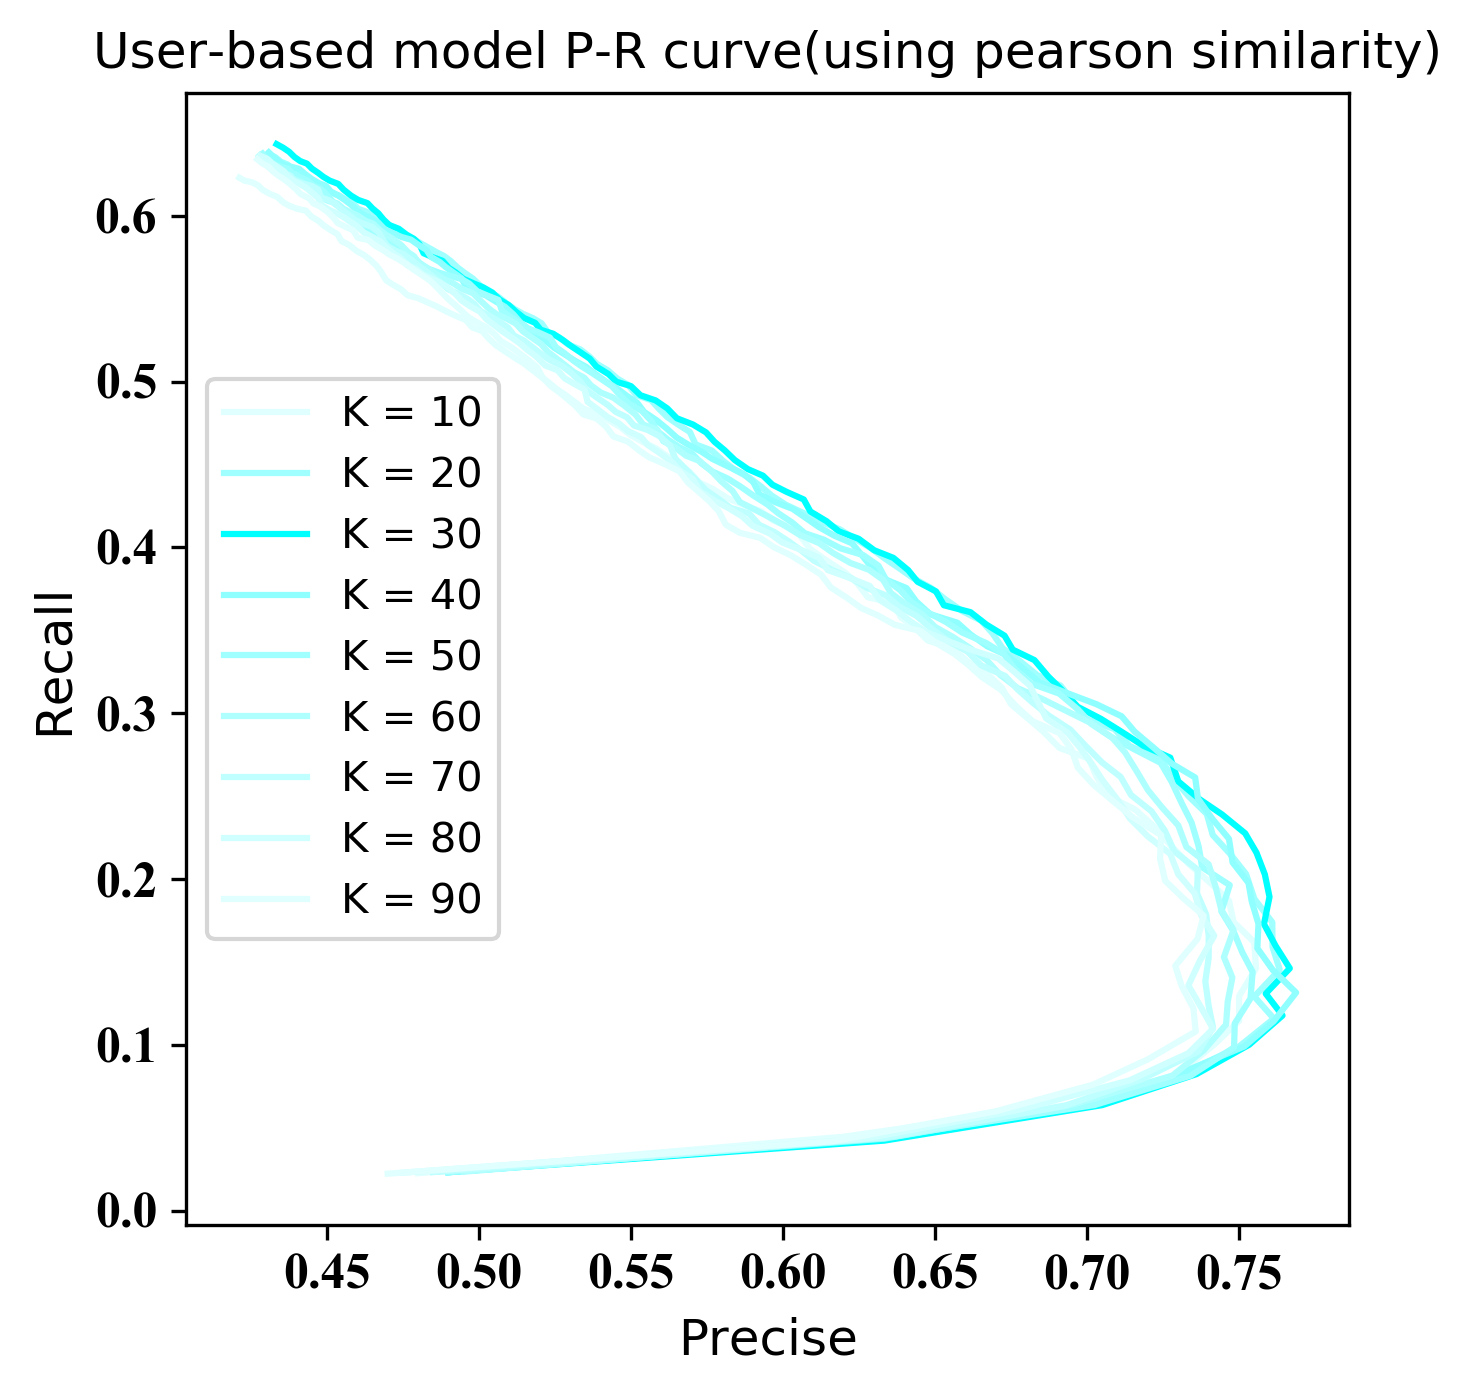

In [19]:
plot_p_r_curves(user_based_pearson_dataframes, 'User-based model P-R curve(using pearson similarity)', save_name='userbased_pr_pearson_movieLens100K')

0xf0ffff
0xe0ffff
0xd0ffff
0x10ffff
0xd0ffff


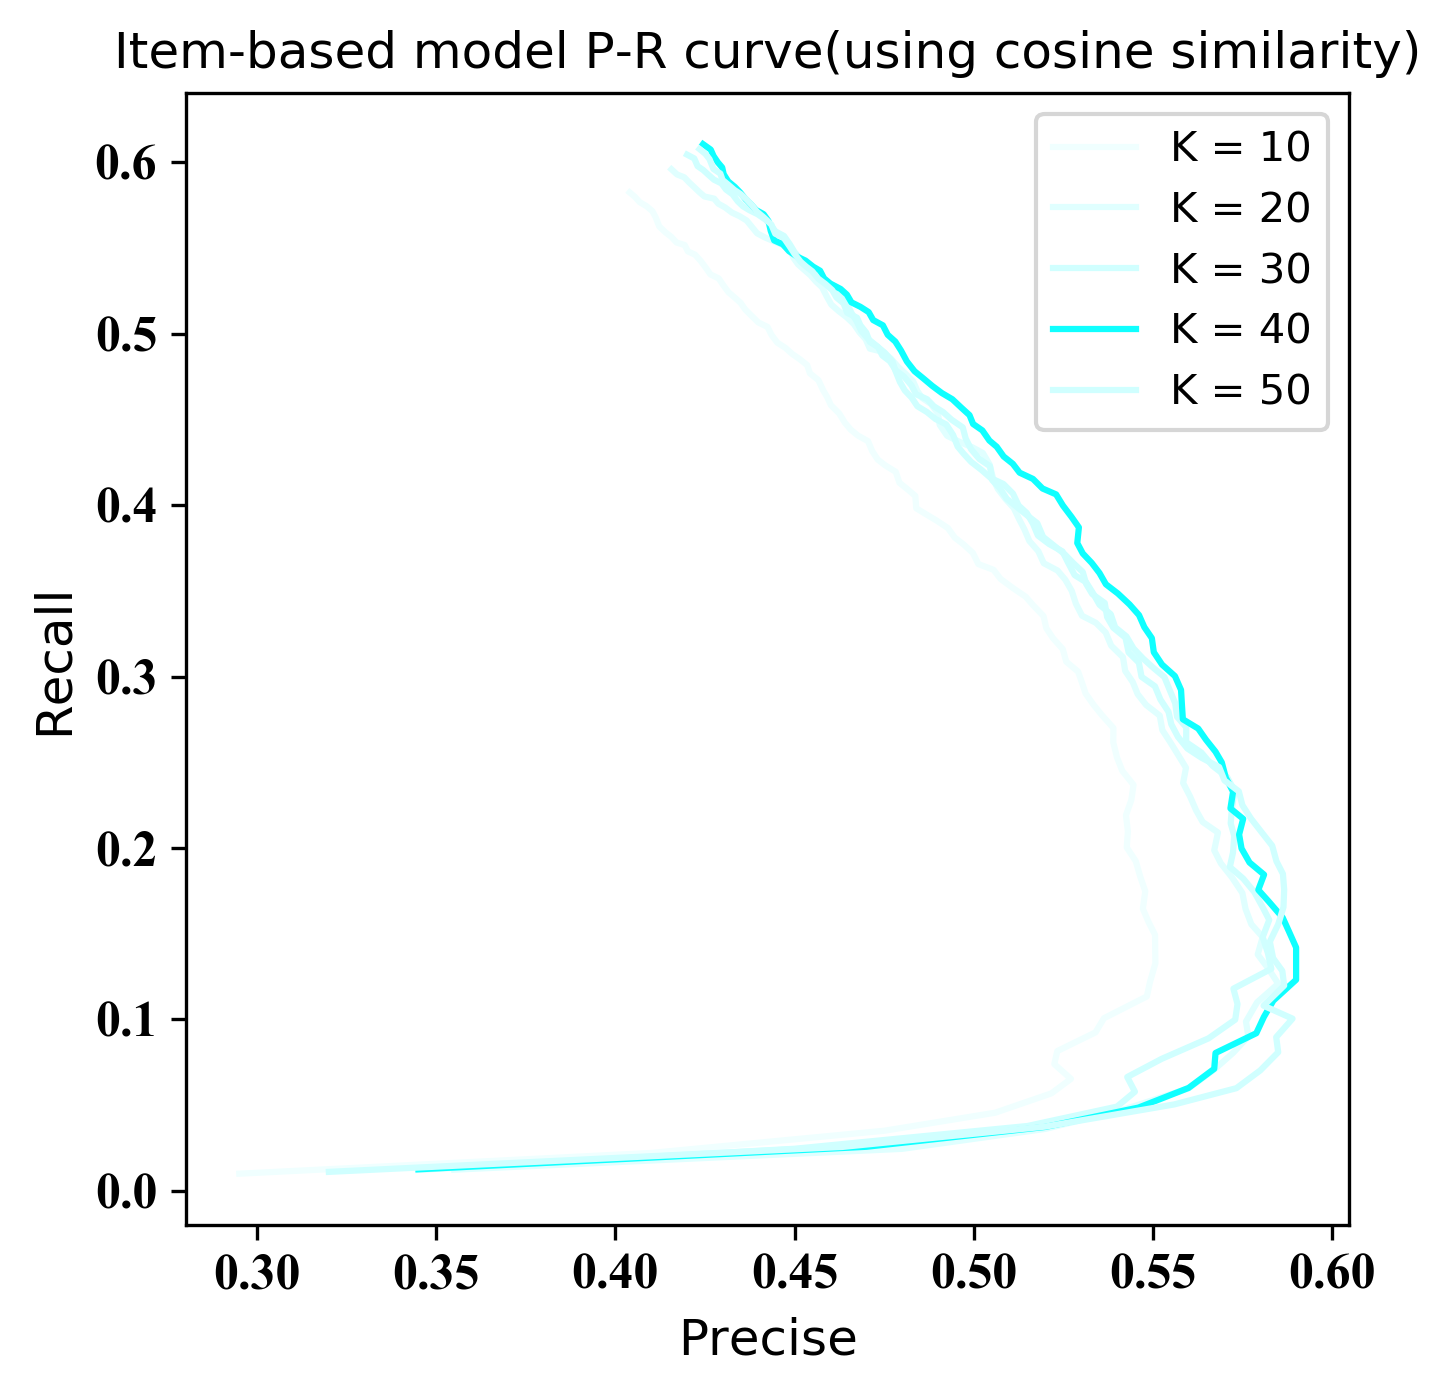

In [56]:
plot_p_r_curves(item_based_cosine_dataframes, 'Item-based model P-R curve(using cosine similarity)', save_name='itembased_pr_cosine_movieLens100K')

0xffe0ff
0xffc0ff
0xffa0ff
0xff80ff
0xff00ff


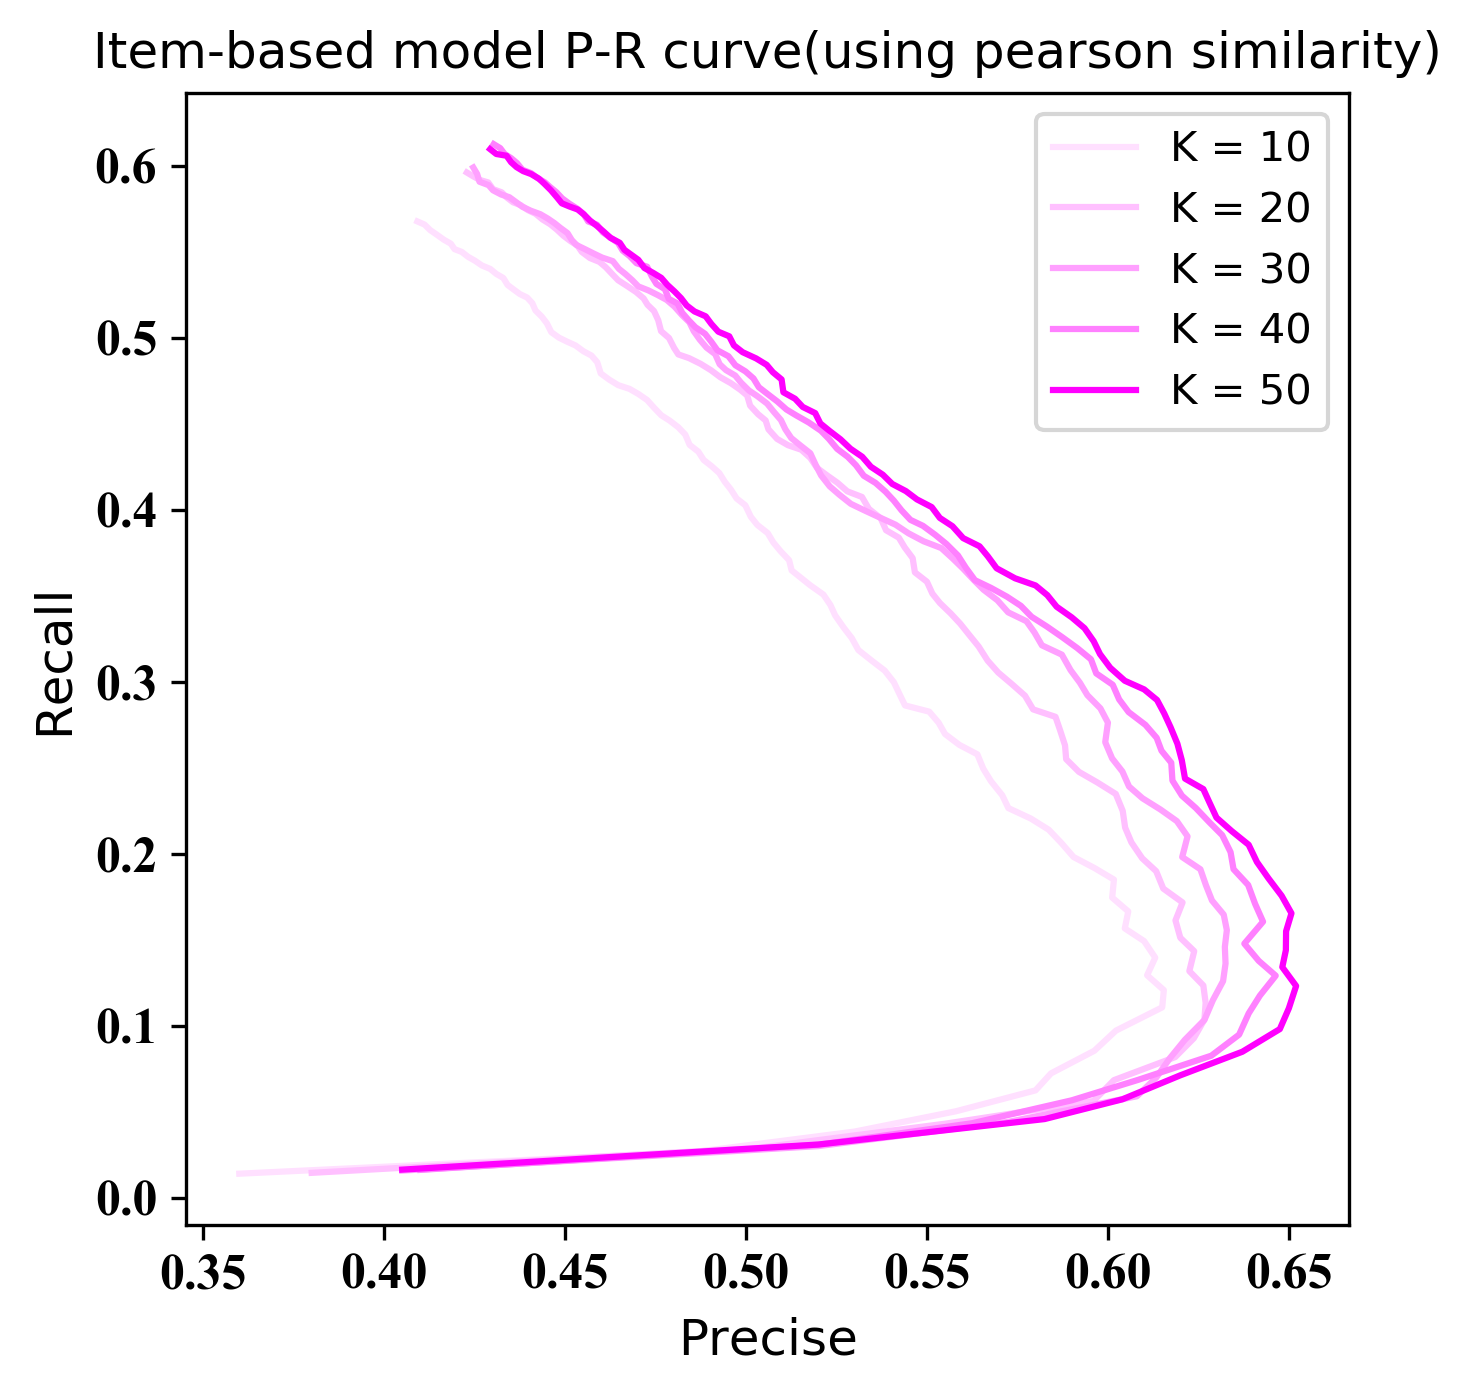

In [68]:
plot_p_r_curves(item_based_pearson_dataframes, 'Item-based model P-R curve(using pearson similarity)', save_name='itembased_pr_pearson_movieLens100K')

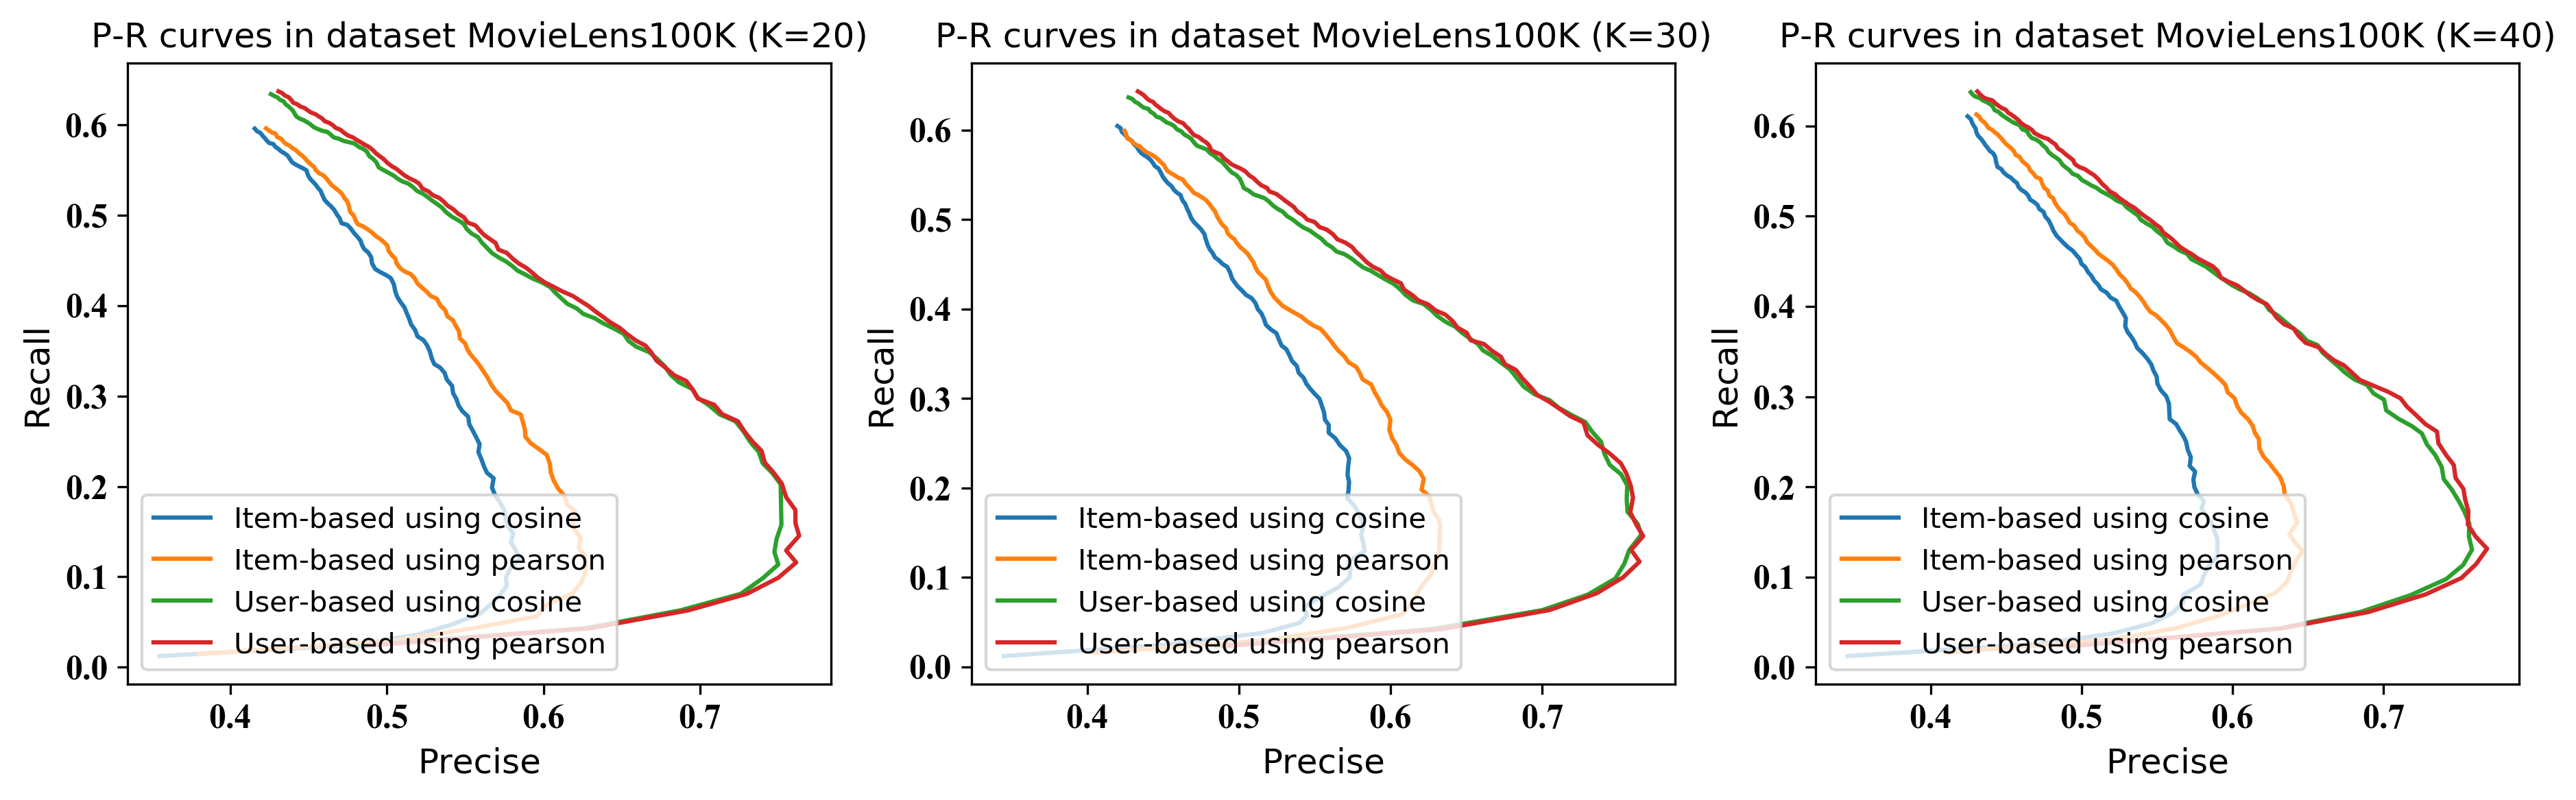

In [76]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(131)
plt.plot(item_based_cosine_dataframes[1]['Precises'], item_based_cosine_dataframes[1]['Recalls'], label='Item-based using cosine')
plt.plot(item_based_pearson_dataframes[1]['Precises'], item_based_pearson_dataframes[1]['Recalls'], label='Item-based using pearson')
plt.plot(user_based_cosine_dataframes[1]['Precises'], user_based_cosine_dataframes[1]['Recalls'], label='User-based using cosine')
plt.plot(user_based_pearson_dataframes[1]['Precises'], user_based_pearson_dataframes[1]['Recalls'], label='User-based using pearson')
plt.title("P-R curves in dataset MovieLens100K (K=20)")
plt.xlabel('Precise', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.legend(fontsize=10)

plt.subplot(132)
plt.plot(item_based_cosine_dataframes[2]['Precises'], item_based_cosine_dataframes[2]['Recalls'], label='Item-based using cosine')
plt.plot(item_based_pearson_dataframes[2]['Precises'], item_based_pearson_dataframes[2]['Recalls'], label='Item-based using pearson')
plt.plot(user_based_cosine_dataframes[2]['Precises'], user_based_cosine_dataframes[2]['Recalls'], label='User-based using cosine')
plt.plot(user_based_pearson_dataframes[2]['Precises'], user_based_pearson_dataframes[2]['Recalls'], label='User-based using pearson')
plt.title("P-R curves in dataset MovieLens100K (K=30)")
plt.xlabel('Precise', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.legend(fontsize=10)

plt.subplot(133)
plt.plot(item_based_cosine_dataframes[3]['Precises'], item_based_cosine_dataframes[3]['Recalls'], label='Item-based using cosine')
plt.plot(item_based_pearson_dataframes[3]['Precises'], item_based_pearson_dataframes[3]['Recalls'], label='Item-based using pearson')
plt.plot(user_based_cosine_dataframes[3]['Precises'], user_based_cosine_dataframes[3]['Recalls'], label='User-based using cosine')
plt.plot(user_based_pearson_dataframes[3]['Precises'], user_based_pearson_dataframes[3]['Recalls'], label='User-based using pearson')
plt.title("P-R curves in dataset MovieLens100K (K=40)")
plt.xlabel('Precise', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.legend(fontsize=10)
#plt.savefig('./user_item_model_pr_curve.jpg', bbox_inches = 'tight')
#plt.savefig('./user_item_model_pr_curve.eps', dpi=300, format='eps', bbox_inches = 'tight')

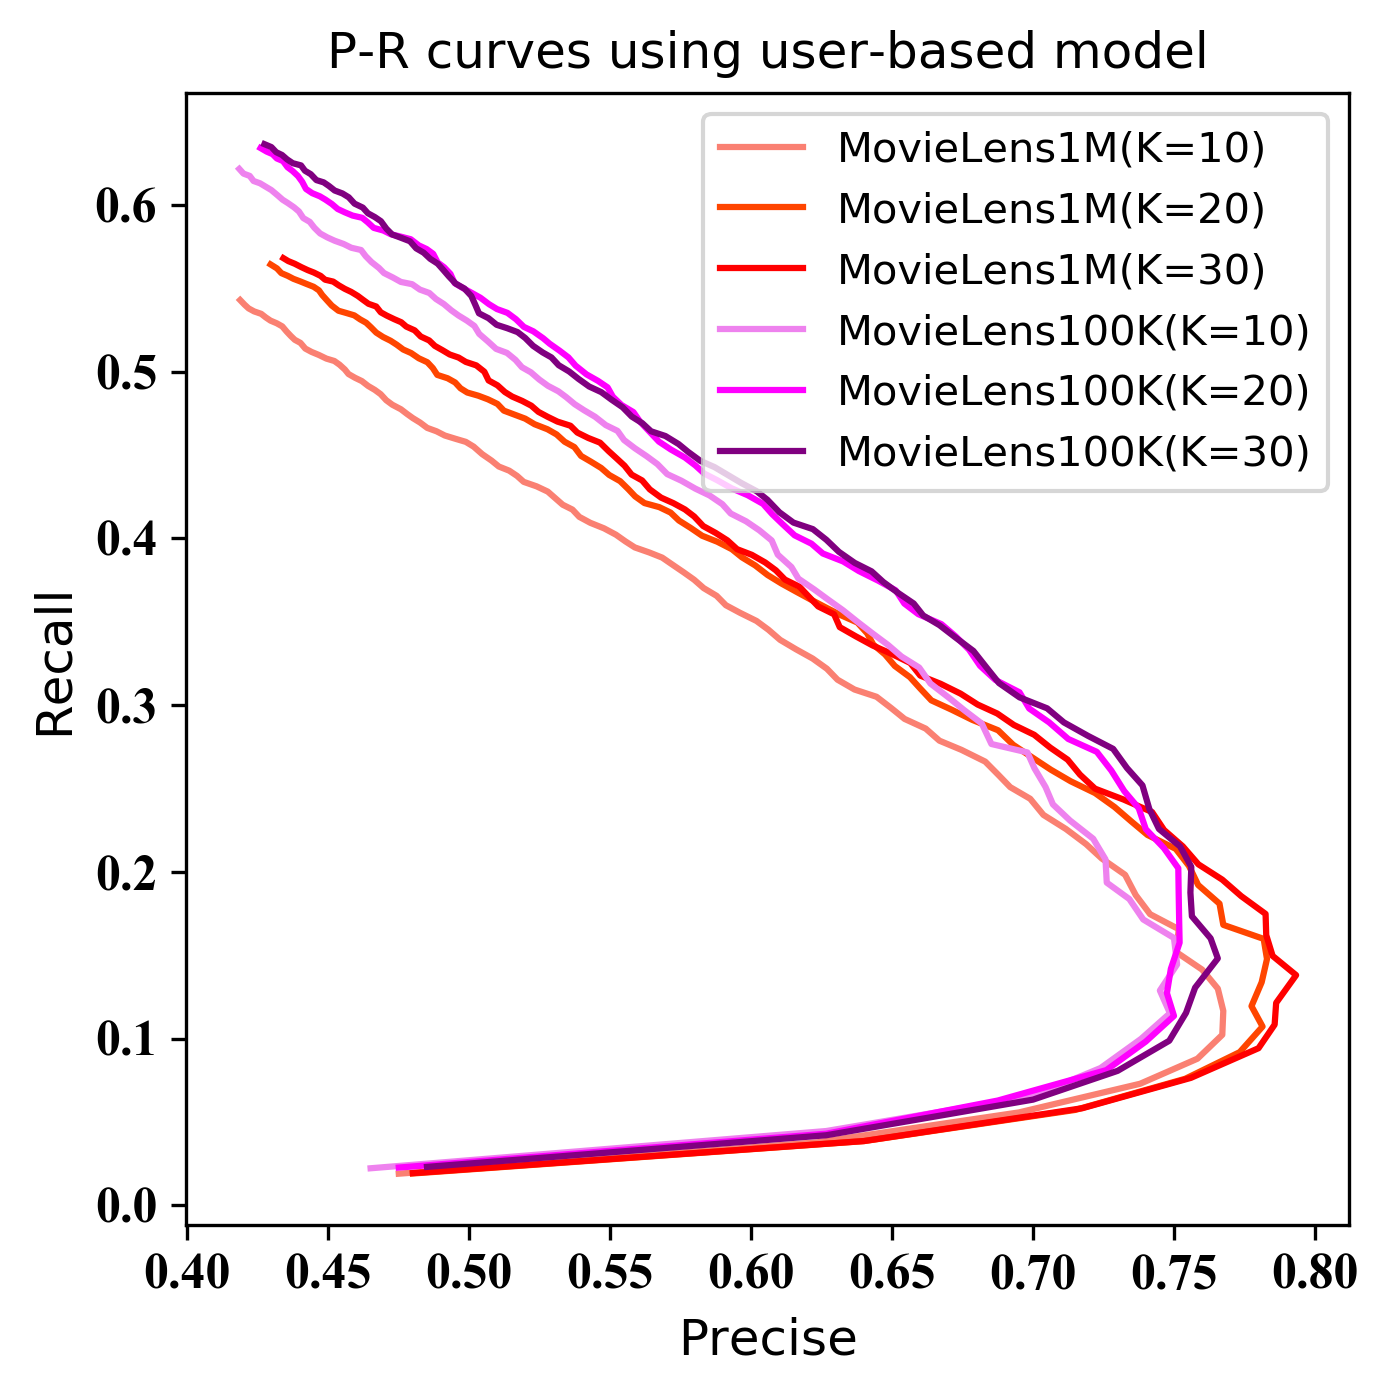

In [87]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (5, 5)

plt.plot(user_based_cosine_dataframes_2[0]['Precises'], user_based_cosine_dataframes_2[0]['Recalls'], 
         label='MovieLens1M(K=10)', c='salmon')
plt.plot(user_based_cosine_dataframes_2[1]['Precises'], user_based_cosine_dataframes_2[1]['Recalls'], 
         label='MovieLens1M(K=20)', c='orangered')
plt.plot(user_based_cosine_dataframes_2[2]['Precises'], user_based_cosine_dataframes_2[2]['Recalls'], 
         label='MovieLens1M(K=30)', c='red')
plt.plot(user_based_cosine_dataframes[0]['Precises'], user_based_cosine_dataframes[0]['Recalls'], 
         label='MovieLens100K(K=10)', c='violet')
plt.plot(user_based_cosine_dataframes[1]['Precises'], user_based_cosine_dataframes[1]['Recalls'], 
         label='MovieLens100K(K=20)', c='magenta')
plt.plot(user_based_cosine_dataframes[2]['Precises'], user_based_cosine_dataframes[2]['Recalls'],
         label='MovieLens100K(K=30)', c='purple')

plt.title("P-R curves using user-based model")
plt.xlabel('Precise', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.legend(fontsize=10)
#plt.savefig('./user_item_model_pr_curve_dataset.jpg', bbox_inches = 'tight')
#plt.savefig('./user_item_model_pr_curve_dataset.eps', dpi=300, format='eps', bbox_inches = 'tight')